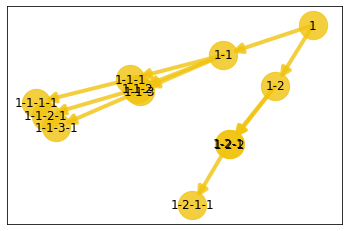

In [75]:
__docformat__ = "restructuredtext en"

from copy import deepcopy
import matplotlib.pyplot as plt
import networkx as nx
from networkx import DiGraph

class PrintDiGraph(DiGraph):

    def __init__(self, data=None, name='', file=None, **attr):
        DiGraph.__init__(self, data=data, name=name, **attr)
        self.write = False
        self.labels = {}
        self.dist = {}
        if file is None:
            import sys
            self.fh = sys.stdout
        else:
            self.fh = open(file, 'w')

    def add_node(self, n, attr_dict=None, **attr):
        DiGraph.add_node(self, n, attr_dict=attr_dict, **attr)
        self.labels[n] = n
        self.dist[n] = {}
        if self.write: self.fh.write("Add node: %s\n" % n)

    def add_nodes_from(self, nodes, **attr):
        for n in nodes:
            self.add_node(n, **attr)

    def remove_node(self, n):
        DiGraph.remove_node(self, n)
        if self.write: self.fh.write("Remove node: %s\n" % n)

    def remove_nodes_from(self, nodes):
        for n in nodes:
            self.remove_node(n)

    def add_edge(self, u, v, attr_dict=None, **attr):
        if v not in self.nodes:
            self.add_node(v, **attr)
            
        self.dist[u][v] = 1
        for e in self.edges():
            if e[0] == u and e[1] != v:
                self.dist[e[1]][v] = 1
                
        DiGraph.add_edge(self, u, v, attr_dict=attr_dict, **attr)
        if self.write: self.fh.write("Add edge: %s->%s\n" % (u, v))

    def add_edges_from(self, ebunch, attr_dict=None, **attr):
        for e in ebunch:
            u, v = e[0:2]
            self.add_edge(u, v, attr_dict=attr_dict, **attr)

    def remove_edge(self, u, v):
        DiGraph.remove_edge(self, u, v)
        if self.write: self.fh.write("Remove edge: %s-%s\n" % (u, v))

    def remove_edges_from(self, ebunch):
        for e in ebunch:
            u, v = e[0:2]
            self.remove_edge(u, v)

    def clear(self):
        DiGraph.clear(self)
        if self.write: self.fh.write("Clear graph\n")


if __name__ == '__main__':
    G = PrintDiGraph()
    G.add_node('1')
    G.add_edge('1', '1-1')
    G.add_edge('1', '1-2')
    G.add_edge('1-1', '1-1-1')
    G.add_edge('1-1', '1-1-2')
    G.add_edge('1-1', '1-1-3')
    G.add_edge('1-1-1', '1-1-1-1')
    G.add_edge('1-1-2', '1-1-2-1')
    G.add_edge('1-1-3', '1-1-3-1')
    G.add_edge('1-2', '1-2-1')
    G.add_edge('1-2', '1-2-2')
    G.add_edge('1-2-1', '1-2-1-1')
#     print("Nodes in G: ", G.nodes(data=True))
#     print("Edges in G: ", G.edges(data=True))

#     G = PrintGraph()
#     nx.add_path(G, range(10))
#     nx.draw(G)

#     G.dist['1-1-3']['1-1-2'] = 1
    pos = nx.kamada_kawai_layout(G) #,dist=G.dist
    nx.draw_networkx_nodes(G, pos, node_color='#f1c40f', node_size=800, alpha=0.8)
    nx.draw_networkx_edges(G, pos, edge_color='#f1c40f', arrowstyle='-|>', arrowsize=20, width=4, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels=G.labels, font_size=12)
    plt.show()